In [1]:
import tensorflow as tf

2023-11-29 00:48:06.014488: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-29 00:48:07.211206: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [1]:
# Data from
# https://www.kaggle.com/datasets/unmoved/30k-cats-and-dogs-150x150-greyscale
# This only needs to be executed once
!cat kaggle_30k-cats-and-dogs_aa  kaggle_30k-cats-and-dogs_ab  kaggle_30k-cats-and-dogs_ac > archive.zip
!unzip archive.zip

Archive:  archive.zip
  inflating: Animal Images/cats/00001098_028.jpg  
  inflating: Animal Images/cats/00001099_003.jpg  
  inflating: Animal Images/cats/00001099_004.jpg  
  inflating: Animal Images/cats/00001099_009.jpg  
  inflating: Animal Images/cats/00001099_011.jpg  
  inflating: Animal Images/cats/00001099_012.jpg  
  inflating: Animal Images/cats/00001099_014.jpg  
  inflating: Animal Images/cats/00001099_015.jpg  
  inflating: Animal Images/cats/00001099_016.jpg  
  inflating: Animal Images/cats/00001292_000.jpg  
  inflating: Animal Images/cats/00001292_002.jpg  
  inflating: Animal Images/cats/00001292_003.jpg  
  inflating: Animal Images/cats/00001292_007.jpg  
  inflating: Animal Images/cats/00001292_010.jpg  
  inflating: Animal Images/cats/00001292_017.jpg  
  inflating: Animal Images/cats/00001292_018.jpg  
  inflating: Animal Images/cats/00001292_021.jpg  
  inflating: Animal Images/cats/00001292_026.jpg  
  inflating: Animal Images/cats/00001292_027.jpg  
  inflati

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "./Animal Images",
    image_size=(150,150),
    color_mode='grayscale',
    seed=1130,
    validation_split=0.2,
    subset='training',
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "./Animal Images",
    image_size=(150,150),
    color_mode='grayscale',
    seed=1130,
    validation_split=0.2,
    subset='validation',
    batch_size=8
)

Found 30061 files belonging to 2 classes.
Using 24049 files for training.
Found 30061 files belonging to 2 classes.
Using 6012 files for validation.


In [22]:
train_ds.class_names

['cats', 'dogs']

In [23]:
# !cp "/content/Animal Images/dogs/2013-05-14_455683826814629185.jpg" /content/

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(150,150,1)),
    tf.keras.layers.Conv2D(32,2,activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,2,activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,2,activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(16,2,activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    # tf.keras.layers.Dense(units=2, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [28]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 150, 150, 1)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 149, 149, 32)      160       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 73, 73, 64)        8256      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 35, 35, 32)       

In [31]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics='accuracy'
)

history = model.fit(
    train_ds,
    epochs=25,
    validation_data=test_ds
)

Epoch 1/25
752/752 [==============================] - 14s 15ms/step - loss: 0.4960 - accuracy: 0.7688 - val_loss: 0.5115 - val_accuracy: 0.7606
Epoch 2/25
752/752 [==============================] - 11s 15ms/step - loss: 0.4770 - accuracy: 0.7787 - val_loss: 0.5008 - val_accuracy: 0.7676
Epoch 3/25
752/752 [==============================] - 11s 15ms/step - loss: 0.4627 - accuracy: 0.7881 - val_loss: 0.5211 - val_accuracy: 0.7596
Epoch 4/25
752/752 [==============================] - 11s 14ms/step - loss: 0.4481 - accuracy: 0.7958 - val_loss: 0.5044 - val_accuracy: 0.7643
Epoch 5/25
752/752 [==============================] - 10s 14ms/step - loss: 0.4350 - accuracy: 0.8048 - val_loss: 0.5086 - val_accuracy: 0.7605
Epoch 6/25
752/752 [==============================] - 12s 16ms/step - loss: 0.4241 - accuracy: 0.8101 - val_loss: 0.5112 - val_accuracy: 0.7691
Epoch 7/25
752/752 [==============================] - 12s 16ms/step - loss: 0.4137 - accuracy: 0.8170 - val_loss: 0.4866 - val_accuracy:

In [ ]:
plt.plot(history.history['loss'])

In [32]:
prediction = model.predict(test_ds.take(1))
print(prediction)

1/1 [==============================] - 0s 157ms/step
[[0.02785303]
 [0.04550429]
 [0.63254106]
 [0.7593732 ]
 [0.01126573]
 [0.10253708]
 [0.00136697]
 [0.29720315]]


In [33]:
images = []
labels = []
for x,y in test_ds.take(1):
    images, labels = x,y

images, labels = list(test_ds.take(1))[0]

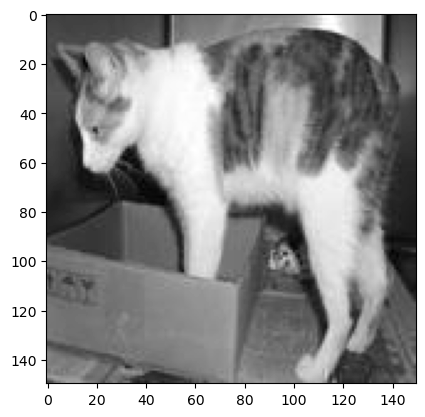

0=Cat, 1=Dog
 label = 0 Prediction = [0.02785303]


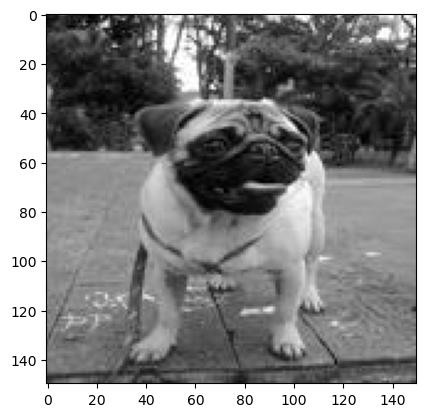

0=Cat, 1=Dog
 label = 1 Prediction = [0.04550429]


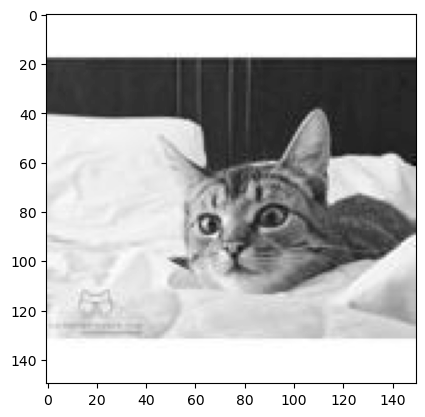

0=Cat, 1=Dog
 label = 0 Prediction = [0.63254106]


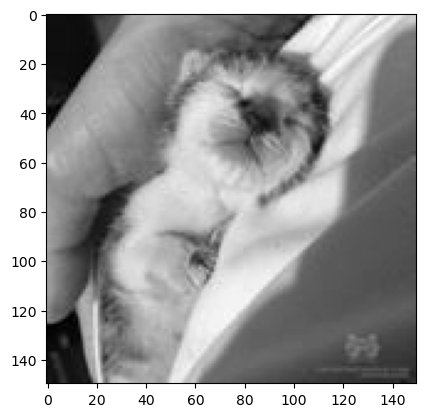

0=Cat, 1=Dog
 label = 0 Prediction = [0.7593732]


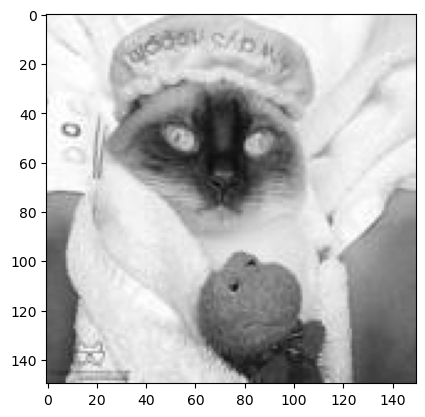

0=Cat, 1=Dog
 label = 0 Prediction = [0.01126573]


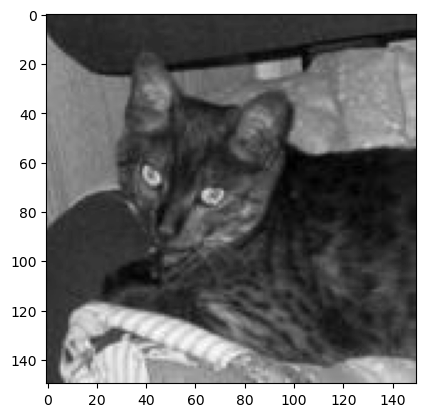

0=Cat, 1=Dog
 label = 0 Prediction = [0.10253708]


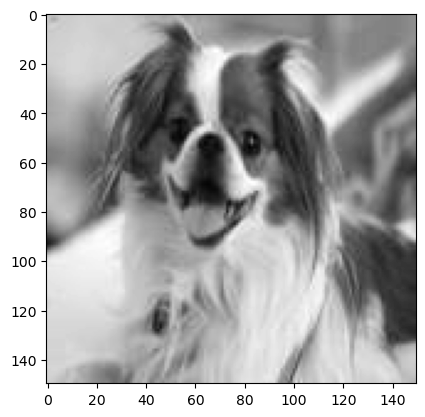

0=Cat, 1=Dog
 label = 1 Prediction = [0.00136697]


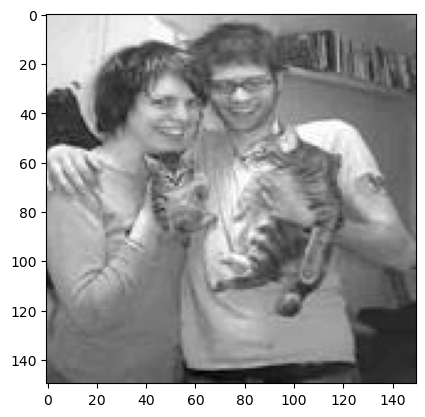

0=Cat, 1=Dog
 label = 0 Prediction = [0.29720315]


In [41]:
for image, label, predic in zip(images,labels, prediction):
    import matplotlib.pyplot as plt
    
    plt.imshow(image, cmap='gray')      
    plt.show()
    print(" 0=Cat, 1=Dog\n","label =", label.numpy(), "Prediction =", predic)

